## Review
You should go over the TensorFlow documentation for __[2D convolutions](https://www.tensorflow.org/api_guides/python/nn#Convolution)__. Most of the documentation is straightforward, except perhaps the __padding__ argument. The padding might differ depending on whether you pass __'VALID'__ or __'SAME'__.

Here are a few more things worth reviewing:

1. Introduction to TensorFlow -> __[TensorFlow Variables](https://www.tensorflow.org/programmers_guide/variables)__.
2. How to determine the dimensions of the output based on the input size and the filter size (shown below). You'll use this to determine what the size of your filter should be.

```python
    new_height = (input_height - filter_height + 2 * P)/S + 1
    new_width = (input_width - filter_width + 2 * P)/S + 1
```

### Instructions
1. Finish off each __TODO__ in the __conv2d__ function.
2. Setup the __strides__, __padding__ and filter weight/bias (__F_w__ and __F_b__) such that the output shape is __(1, 2, 2, 3)__. Note that all of these except __strides__ should be TensorFlow variables.

In [1]:
"""
Setup the strides, padding and filter weight/bias such that
the output shape is (1, 2, 2, 3).
"""
import tensorflow as tf
import numpy as np

# `tf.nn.conv2d` requires the input be 4D (batch_size, height, width, depth)
# (1, 4, 4, 1)
x = np.array([
    [0, 1, 0.5, 10], # batch
    [2, 2.5, 1, -8], # height
    [4, 0, 5, 6], # width
    [15, 1, 2, 3]], # depth
    dtype=np.float32).reshape((1, 4, 4, 1))
X = tf.constant(x)


def conv2d(input):
    # Filter (weights and bias)
    # The shape of the filter weight is (height, width, input_depth, output_depth)
    height = 2
    width = 2
    input_depth = 1
    output_depth = 3

    # TODO: Define the filter weights `F_W` and filter bias `F_b`.
    # NOTE: Remember to wrap them in `tf.Variable`, they are trainable parameters after all.
    F_W = tf.Variable(tf.truncated_normal((height, width, input_depth, output_depth)))
    # The shape of the filter bias is (output_depth,)
    F_b = tf.Variable(tf.zeros(output_depth))

    # TODO: Set the stride for each dimension (batch_size, height, width, depth)
    batch_size = 1
    strides = [batch_size, height, width, input_depth]
    # TODO: set the padding, either 'VALID' or 'SAME'.
    padding = 'VALID'
    # https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#conv2d
    # `tf.nn.conv2d` does not include the bias computation so we have to add it ourselves after.
    return tf.nn.conv2d(input, F_W, strides, padding) + F_b

out = conv2d(X)

# Solução

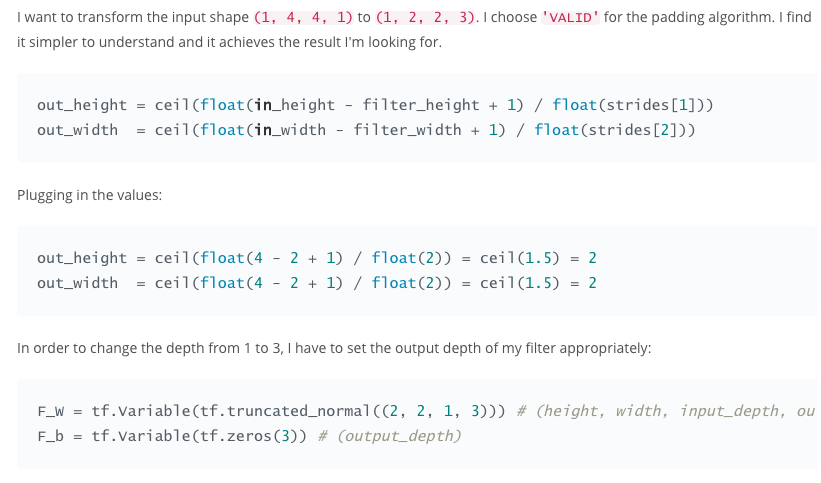